# Decision Trees and Random Forests
* We'll take a look at a powerful, non-parametric algorithm called random forests.  
* Random forests are an example of an ensemble method, meaning that it relies on aggregating the results of an ensemble of simpler estimators.
* A majority vote among a number of estimators can end up being better than any of the individual estimators doing the voting.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Motivating Random Forests: Decision Trees
* Random forests are an example of an ensemble learner built on decision trees. For this reason we'll start by discussing decision trees themselves.
* Decision trees are extremely intuitive: you simply ask a series of questions designed to isolate a sample.
* For example, if you wanted to build a decision tree to classify an animal, you might construct the tree shown here:

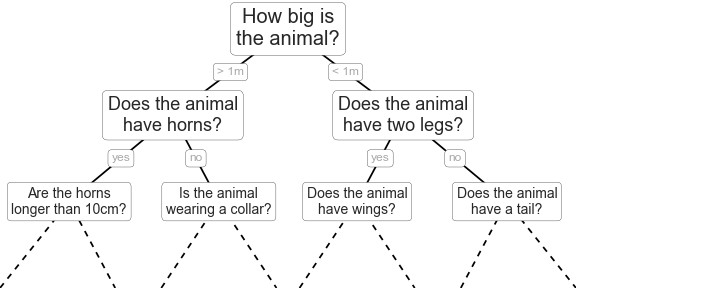

In [2]:
from IPython.display import Image
Image('images/decision-tree.png')

* The binary splitting makes this extremely efficient (Given a proper tree). Why? 
* But which questions should we ask? 
* In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.  

Let's now look at an example of this.

### Creating decision trees
Consider the following dataset:

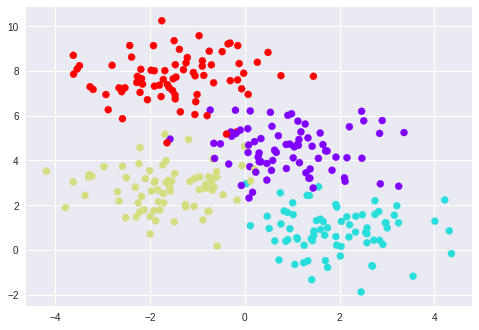

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

* A simple decision tree built on this data will iteratively split the data along one or the axis. 
* At each level the algorithm assigns the label of the new region according to a majority vote of points within it

This figure presents a visualization of the first four levels of a decision tree classifier for this data:

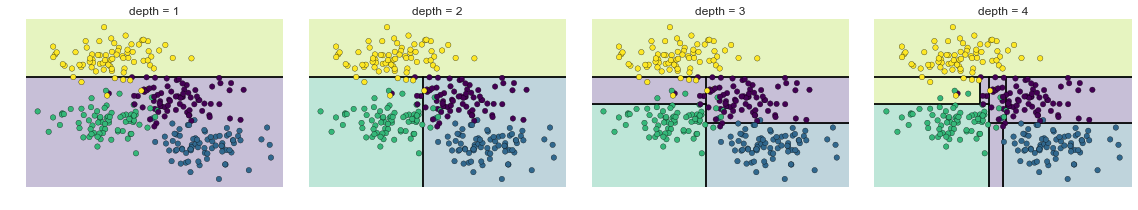

In [8]:
from IPython.display import Image
Image('images/decision_tree.png')

Why is the uppermost branch not split?

In Scikit-Learn a `DecisionTreeClassifier` estimator is used to construct Decision Trees.

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [10]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

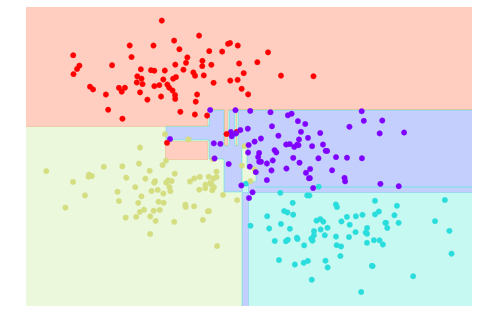

In [13]:
visualize_classifier(DecisionTreeClassifier(), X, y)

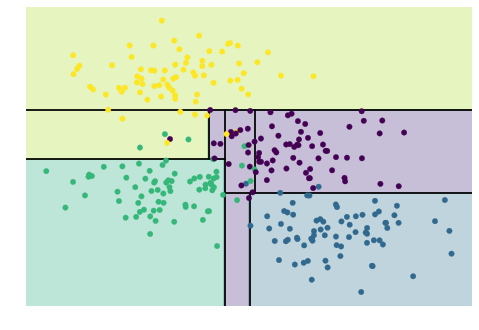

In [22]:
from helper.interactive_tree import plot_tree_interactive
plot_tree_interactive(X, y);

What do you think is the best classifier?

### Decision trees and overfitting
* A model overfits the data when it learns the training data rather than the overall properties of the distribuition they came from.
* DTs tend to overfit

In the following example we split the dataset and train a tree on each of the splits:

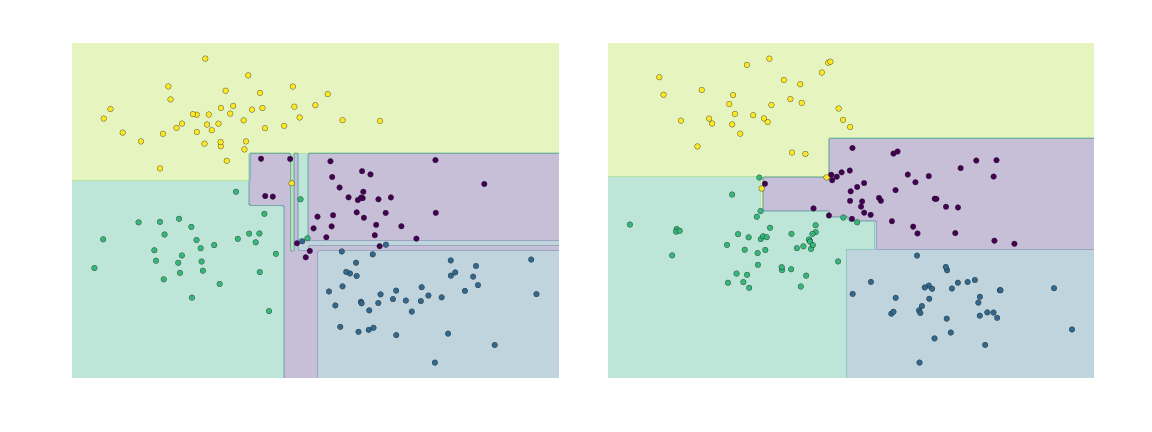

In [24]:
from IPython.display import Image
Image('images/decision-tree-overfitting.png')

* In some regions the trees produce consistent results
* In other regions they do not agree
* Inconsistencies happen where different class datapoints are near
* Can we use both trees to enhance the prediction?

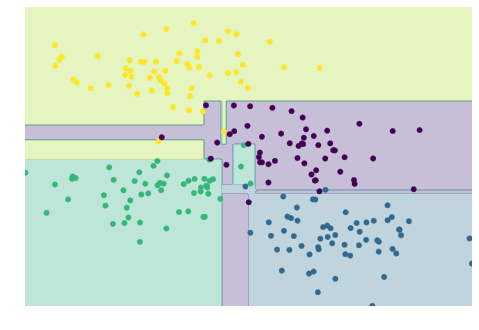

In [25]:
from helper.interactive_tree import randomized_tree_interactive
randomized_tree_interactive(X, y)

### Ensembles of Estimators: Random Forests
* Idea: multiple overfitting estimators can be combined to reduce the effect of this overfitting. This is called _bagging_. 
* Bagging makes use of an ensemble of parallel estimators (each of which overfits the data) and averages the results to find a better classification.
* An ensemble of randomized decision trees is known as a _random forest_.

This type of bagging classification can be done manually using Scikit-Learn's `BaggingClassifier` meta-estimator, as shown here:

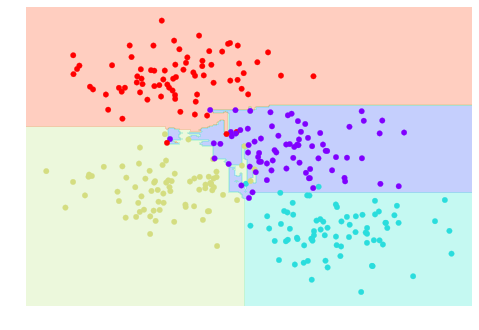

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

We've built a Random Forest by hand. But Scikit-Learn comes with a `RandomForestClassifier` estimator which is easier to handle:

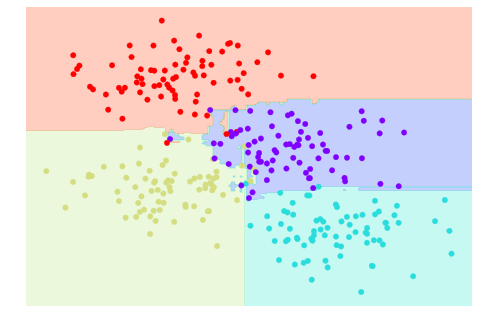

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

## Final thoughts
* Random forests are fast to train and predict very fast as well.
* They allow parallel execution.
* Random forests can inform us about their confidence in the prediction.
* Random forests are hyper-parameter free.